In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [360]:
df = pd.read_csv("archive\Social_Network_Ads.csv")

In [361]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [362]:
# new data frame with split value columns
gender_df = df.drop(['User ID'], axis=1, inplace=False)

In [363]:
gender_df.duplicated().sum()
gender_df.drop_duplicates(inplace=True)

In [364]:
# df.drop(['User ID','Gender'], axis = 1, inplace = True)

In [365]:
# df.head()

In [366]:
styler = gender_df.head(10).style
# styler.background_gradient(cmap='bwr')
styler.highlight_min(color='lightblue')
styler.highlight_max(color='lightgreen')


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [367]:
gender_df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,380.000000,37.586842,10.592492,18.000000,29.000000,37.000000,46.000000,60.000000
EstimatedSalary,380.000000,70421.052632,34604.155483,15000.000000,43000.000000,70500.000000,88000.000000,150000.000000
Purchased,380.000000,0.368421,0.483012,0.000000,0.000000,0.000000,1.000000,1.000000


In [368]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           380 non-null    object
 1   Age              380 non-null    int64 
 2   EstimatedSalary  380 non-null    int64 
 3   Purchased        380 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.8+ KB


In [369]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [370]:
# correlation matrix
# styler = gender_df.corr().style
# styler.highlight_between(left = -1, right = -0.85, color= 'red')
# styler.highlight_between(left = 0.85, right = 1, color= 'red')

In [371]:
# heat matrix
# import seaborn as sns
# plt.figure(figsize=(10, 5))
# mask = np.triu(np.ones_like(df.corr(), dtype=bool))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

<div style="background-color: #006a4e; color:white; text-align:center"><font size = "5">Analyse the target variable</div>

In [372]:
# return the frequency of distinct values of the column Purchased
print(gender_df['Purchased'].value_counts())
print(gender_df.shape)

Purchased
0    240
1    140
Name: count, dtype: int64
(380, 4)


C:\Users\ratan\AppData\Local\Temp\ipykernel_7784\1515428785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = gender_df, x = 'Purchased', palette = 'dark')


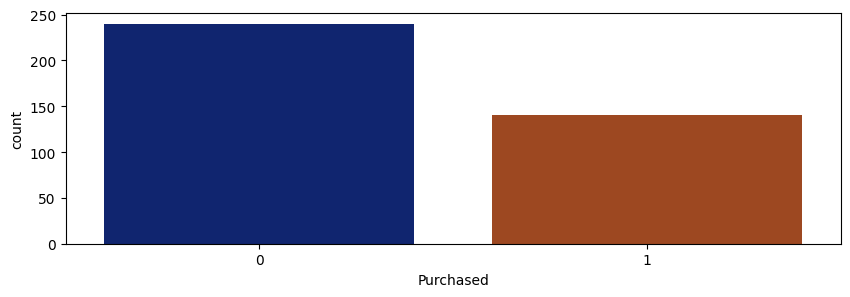

In [373]:
plt.figure(figsize = (10, 3))
sns.countplot(data = gender_df, x = 'Purchased', palette = 'dark')
plt.show()

<div style="background-color:#006a4e; color: white">
according to above data, we can say that few people Purchase the product after seeing the ad and few people not purchase the product after seeing the ad.
</div>

<center><h3>Visualization and statistical analysis of Target with respect to Gender</h3></center>

In [374]:
gender_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [375]:
gender_df.groupby('Gender').value_counts(subset=['Purchased'])

Gender  Purchased
Female  0            121
        1             77
Male    0            119
        1             63
Name: count, dtype: int64

C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

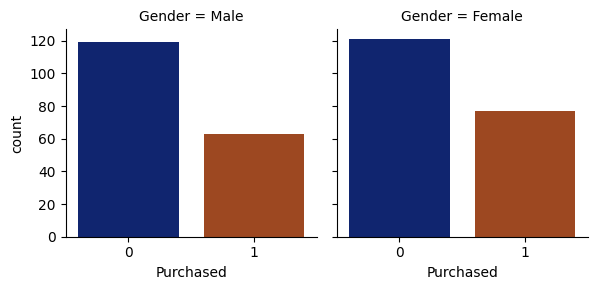

In [376]:
# also print the frequency in the countplot graph
fig = sns.FacetGrid(gender_df, col = 'Gender')
fig.map(sns.countplot, 'Purchased', palette = 'dark')
fig.add_legend()

C:\Users\ratan\AppData\Local\Temp\ipykernel_7784\365923726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Purchased', col='Gender', kind='count', data=gender_df, palette="Dark2");  # general function to plot categorical plots


<Figure size 1000x300 with 0 Axes>

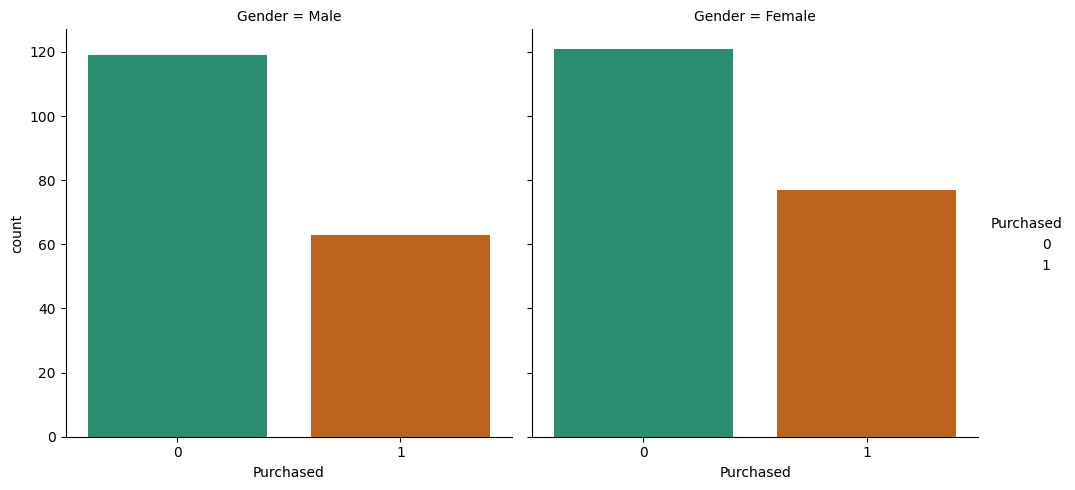

In [377]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Purchased', col='Gender', kind='count', data=gender_df, palette="Dark2");  # general function to plot categorical plots
plt.show()

In [378]:
pd.crosstab(gender_df.Gender, gender_df.Purchased, normalize='index').style.highlight_max(color='lightgreen', axis = 0)
                                        # normalize = 'all' gives the percentage of the total
                                        # normalize = 'index' gives the percentage of the row
                                        # normalize = 'columns' gives the percentage of the column            

Purchased,0,1
Gender,,
Female,0.611111,0.388889
Male,0.653846,0.346154


<div style="background-color:#006a4e; color: white"> 38.8% of female coustmers purchased have the product while only 34.6% of male purchased have the product from social media advertisement </div>

<center><h3>Distribution and Visualisation of Age and Estimated Salary<h3></center>

In [379]:
gender_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


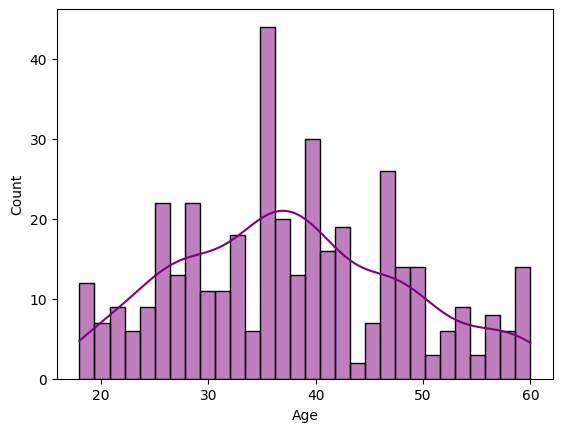

In [380]:
# plot the histogram of the Age column to see which age group is more likely to buy the product
sns.histplot(df['Age'], kde=True, color='purple', bins=30)
                                            # kde = True gives the density plot which is the smooth curve over the histogram
                                            # bins = 30 gives the number of bins which means the number of bars in the histogram                                                
plt.show()  

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

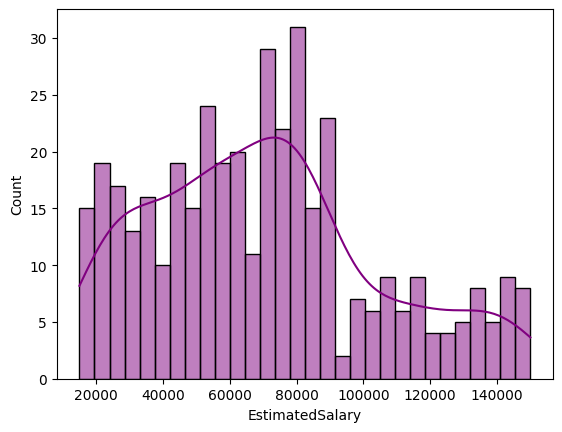

In [381]:
# plot the histogram of the EstimatedSalary column to see which salary group is more likely to buy the product
sns.histplot(df['EstimatedSalary'], kde=True, color='purple', bins=30)

<div style="background-color:#006a4e; color: white">
People with a high estimated salary(>90k) tend to watch advertisements less frequently.
</div>


<div style="background-color:#006a4e; color: white">
Skew is towards age group 35-38 and estimated salary skew is towards 70k to 90k 
</div>

<!-- skew means the data is not normally distributed and it is skewed towards left or right side.
skewness is the measure of asymmetry of the probability distribution of a real-valued random variable about its mean. -->

<center><h3>Pair Plot of Age and Estimated Salary with Target</h3></center>

In [382]:
gender_df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


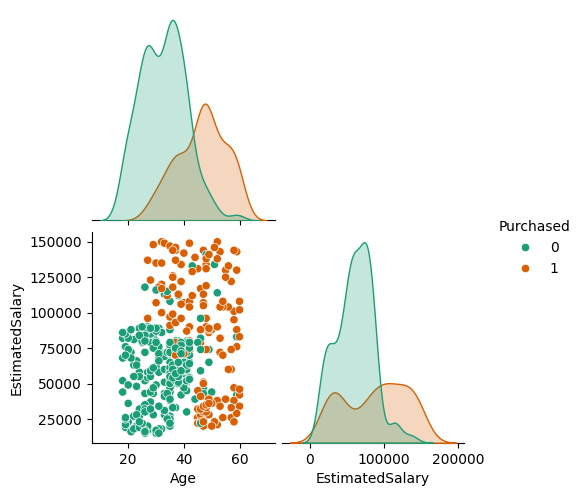

In [383]:
sns.pairplot(gender_df , hue = 'Purchased',palette='Dark2',corner=True )

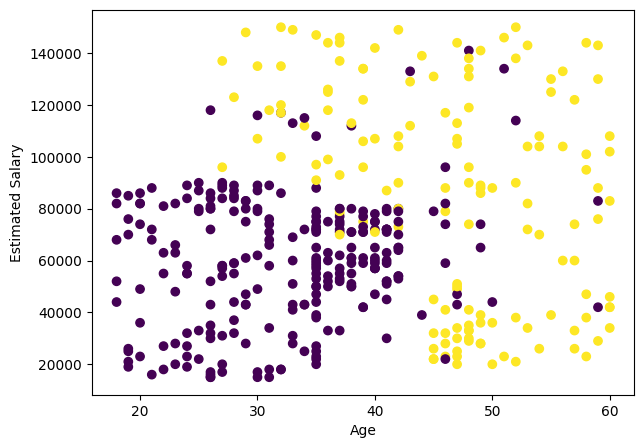

In [384]:
# considering Age and EstimatedSalary as x and y axis respectively and Purchased varible to differentiate between the two classes. draw graph
plt.figure(figsize = (7, 5))
plt.scatter(df['Age'], df['EstimatedSalary'], c = df['Purchased'])
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show() 

<div style="background-color:#006a4e; color: white">
From pair plot and scatter plot it is clear that if scaling is not done, Estimated Salary will dominate Age, which will result in a biased model. Feature Scaling will be done after splitting the model into training and test set.
</div>

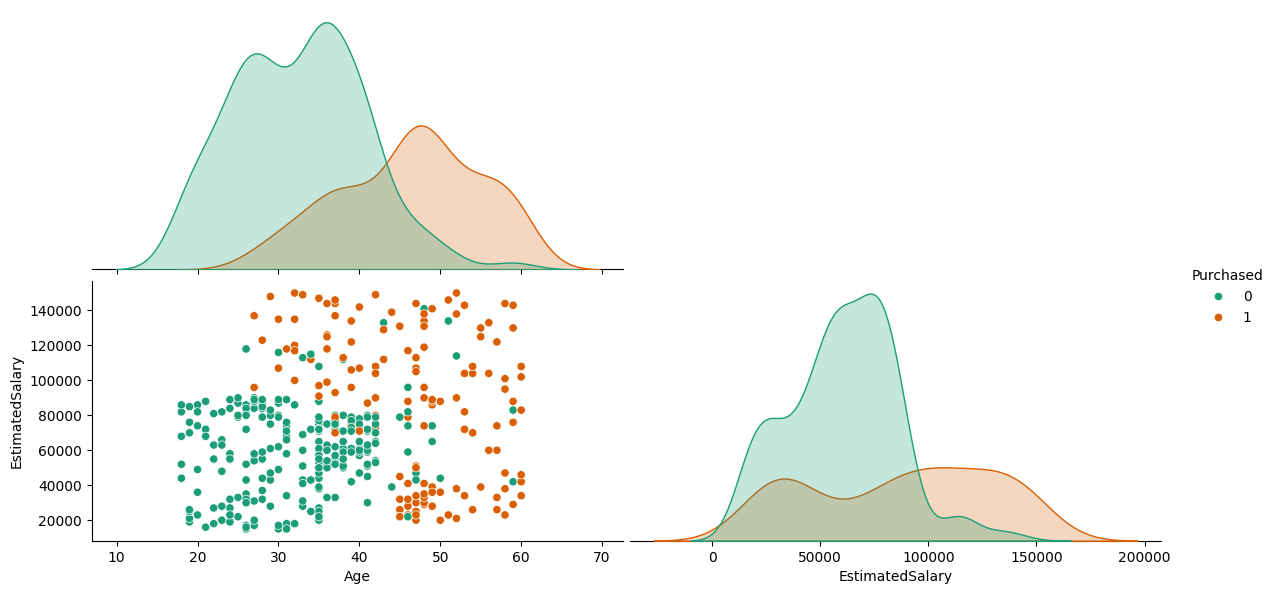

In [385]:
sns.pairplot(gender_df, hue='Purchased', palette='Dark2', corner=True, height=3, aspect=2)

<center style="background-color:#006a4e; color: white"><h3>Encoding Categorical Data</h3></center>

Column Gender contain categorical variables, it should be encoded before building the model.

For enoding categorical data, dummy variable is to be created for each discrete categorical variable in each column which can be done by using pandas.get_dummies() which will return dummy-coded data. By using drop_first we can drop first dummy variable.

In [386]:
gender_df = pd.get_dummies(gender_df, drop_first=True, columns=['Gender']).astype('int64')

In [387]:
gender_df.head(3)

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0


In [388]:
# considering Age and EstimatedSalary as features and Purchased as target
x = gender_df.drop(['Purchased'], axis = 1)
y = gender_df['Purchased']

<center style="background-color:#006a4e; color: white"> Splitting the dataset into the Training set and Test set</center>

In [389]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [390]:
x_train.describe().T.style.background_gradient(cmap='bwr')

,count,mean,std,min,25%,50%,75%,max
Age,304.000000,37.796053,10.801747,18.000000,30.000000,37.000000,46.000000,60.000000
EstimatedSalary,304.000000,70095.394737,34621.300296,15000.000000,42750.000000,70000.000000,89000.000000,150000.000000
Gender_Male,304.000000,0.503289,0.500814,0.000000,0.000000,1.000000,1.000000,1.000000


In [391]:
# in column wise, min value gets highlighted in blue and max value gets highlighted in red
x_test.describe().T.style.background_gradient(cmap='bwr')

,count,mean,std,min,25%,50%,75%,max
Age,76.000000,36.750000,9.732591,19.000000,29.000000,37.000000,42.000000,59.000000
EstimatedSalary,76.000000,71723.684211,34734.266917,15000.000000,51500.000000,71000.000000,86000.000000,150000.000000
Gender_Male,76.000000,0.381579,0.489002,0.000000,0.000000,0.000000,1.000000,1.000000


<center style="background-color:#006a4e; color: white"><h3>Feature Scaling</h3></center>

In [392]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [393]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

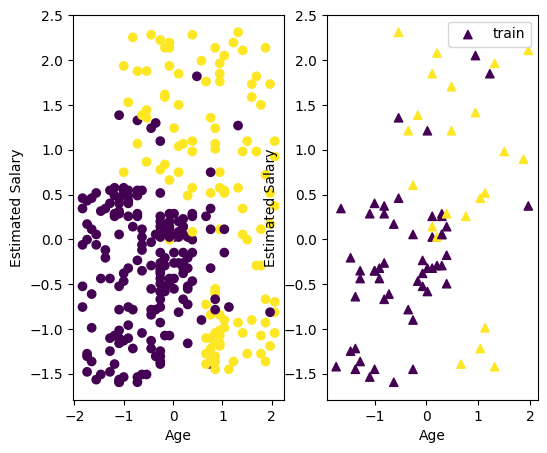

In [394]:
fig, ax = plt.subplots(1, 2, figsize = (6, 5))
ax[0].scatter(x_train[:, 0], x_train[:, 1], c = y_train)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Estimated Salary')

ax[1].scatter(x_test[:, 0], x_test[:, 1], c = y_test, marker = '^')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Estimated Salary')
ax[1].legend(['train', 'test'])

plt.show()

In [395]:
type(x_train)

numpy.ndarray

In [396]:
pd.DataFrame(x_train).describe().T.style.background_gradient(cmap='bwr')

,count,mean,std,min,25%,50%,75%,max
0,304.000000,0.000000,1.001649,-1.835693,-0.722930,-0.073818,0.760754,2.058978
1,304.000000,-0.000000,1.001649,-1.593997,-0.791145,-0.002760,0.546940,2.311766
2,304.000000,0.000000,1.001649,-1.006601,-1.006601,0.993443,0.993443,0.993443


<center style="background-color:#006a4e; color: white">Support Vector Machine (SVM)</center>

Support Vector Machine is a set of supervised learning methods and is used for classification, regression, and outliers detection. The main advantage of SVM is it is effective in high dimensional space even when the number of samples is less than the number of dimensions. But in cases where dimensions are more than the number of samples, overfitting is to be avoided.

The main goal of the SVM algorithm is to create the best line or decision boundary which is the hyperplane that can segregate n-dimensional space into classes so that it can put the new data point in the correct category in the future.

Unlike other classifiers which pay attention to all of the points, Support vector machines focus only on the points that are the most difficult to classify

In [397]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

In [398]:
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [399]:
print(classifier.gamma)
print(classifier.C)

scale
1.0


In [400]:
y_pred = classifier.predict(x_test)

In [401]:
classifier.score(x_test, y_pred)

1.0

In [402]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [403]:
cm

array([[48,  5],
       [ 4, 19]], dtype=int64)

In [404]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.881578947368421

In [405]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.79      0.83      0.81        23

    accuracy                           0.88        76
   macro avg       0.86      0.87      0.86        76
weighted avg       0.88      0.88      0.88        76



<center style="background-color:#006a4e; color: white">HyperParameter Tuning</center>

Hyperparameter optimization is a method of choosing a set of optimal hyperparameters for a learning algorithm. The machine learning model can have different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. 
The main difference between <b>parameters</b> and <b>hyperparameters</b> are, <b><u>parameters are learned automatically</u></b> where as <b><u>hyperparameters value are set manually</u></b>.

The result of a hyperparameter optimization is a single set of well-performing hyperparameters that you can be configured to the model for best performance.
To get well-performing hyperparameters there different search approarch like <b>Grid Search</b>, <b>Random Search</b>, <b>Bayesian optimization</b>, <b>Gradient-based optimization</b>, <b>Evolutionary optimization</b>, <b>Population-based</b>.

<center style="background-color:#006a4e; color: white">GridSearch<center>

Grid search is kind of tuning process, which selects the best parameters for an algorithm to optimize its performance but it take quite long time to run. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid. GridSearchCV implements a “fit” and a “score” method.

When training an SVM, two parameters must be considered:

C

gamma

By using Grid search best optimal value for C and gamma as well as best Kernel for SVM can be found out.

<center style="background-color:#006a4e; color: white">C Parameter</center>

SVC Implementation is based on libsvm(library for Support Vector Machines). C is the Regularization parameter in SVC and its float with default value 1. The strength of the regularization is inversely proportional to C. It must be strictly positive.

C determines the trade-off between increasing the margin size and ensuring that the training points lie on the correct side of the margin. If the value of C is small it will create a larger-margin separating hyperplane without taken care it will misclassify more points leading to large training error. Whereas if the value of C is very large optimizer will choose a smaller-margin separating hyperplane which will classify training points correctly but can lead to overfitting.

Choosing value of C is critical in SVC and which can be done by hyperparameter tuning.

<center style="background-color:#006a4e; color: white">gamma Parameter</center>

The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors and it is Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.The default value of gamma is ‘scale’ and its value is `1 / (n_features * X.var())`.

When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. But the higher value of gamma will exactly fit the training data points but will lead to overfitting.

In [406]:
from sklearn.model_selection import GridSearchCV
g = GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1,0.1,0.01,0.001,0.0001,1.1,1.2],'kernel': ('linear', 'rbf')})

In [407]:
g.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ('linear', 'rbf')})

The Grid search gives a combination of values which have the highest accuracy among all the values.

In [408]:
g.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

<center style="background-color:#006a4e; color: white">Best Parameter for SVM is Kernel rbf with gamma =1 and C =1.</center>

In [409]:
g.best_estimator_

SVC(C=1, gamma=1)

In [410]:
grid_pred = g.predict(x_test)

<center style="background-color:#006a4e; color: white">Evalution with Grid Search<center>

In [411]:
print(confusion_matrix(y_test,grid_pred))

[[48  5]
 [ 4 19]]


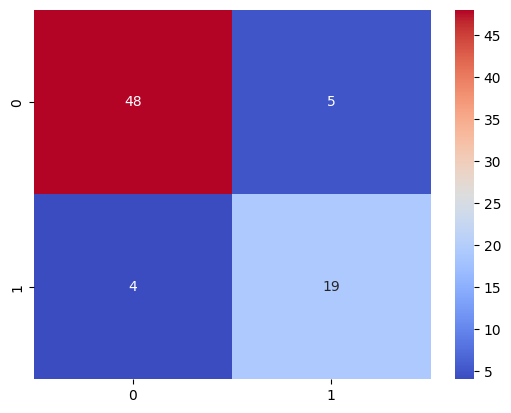

In [412]:
sns.heatmap(confusion_matrix(y_test,grid_pred), annot=True, fmt='d', cmap='coolwarm')
plt.show()

In [413]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.79      0.83      0.81        23

    accuracy                           0.88        76
   macro avg       0.86      0.87      0.86        76
weighted avg       0.88      0.88      0.88        76

